# Introdução ao Aprendizado de Máquina

O aprendizado de máquina é uma forma de inteligência artificial que permite que um sistema aprenda a partir de dados, e não através de programação explícita. No entanto, não é um processo simples.

Na última década, o aprendizado de máquina proporcionou avanços tecnólogicos como carros autônomos, reconhecimento prático de fala, pesquisa eficaz na web e uma compreensão muito melhorada do genoma humano. Hoje, o aprendizado de máquina é tão difundido que você provavelmente o usa inúmeras vezes durante o dia sem conhecê-lo.

Neste curso você aprenderá sobre técnicas de aprendizado de máquina e aprenderá a implemntá-las. Inialmente será apresentado a ideia central do aprendizado de máquina e posteriormente estudos de casos com o pacote `scikit-learn`.

### Pré requisitos

Os pré-requisitos que serão úteis para o curso são: 

- programação básica em python
- análise exploratória de dados no python
- conhecimentos teóricos básicos sobre modelos de regressão

## Principais tipos de Aprendizado de Máquina

### Aprendizado supervisionado

No aprendizado supervisionado começamos por um conjunto de dados já rotulado, onde sabemos qual é classificação correta de cada dado em nossa base. Para assim, com base nesses dados, construir um modelo capaz de classificar outros dados não rotulados, mas do mesmo tipo. Por exemplo, um algoritmo de aprendizado de máquina que saiba diferenciar animais entre milhões outros, com base em imagens e descrições escritas.

### Aprendizado não supervisionado

Diferentemente, o aprendizado _não_ supervisionado é utilizado em problemas com uma grande quantidade de dados não rotulados. Sem a intervenção humana, o aprendizado não supervisionado tenta entender o significado por trás desses dados e classificá-los com base em padrões. Por exemplo, .....

### Amostra treino e teste

Para treinar nossos modelos de aprendizagem de máquina dividimos nossa base de dados em amostra treino e amostra teste. Mas por que fazer isso?

Poderíamos usar todos os dados disponíveis para treinamento e teste no mesmo conjunto de dados. Mas imagine um aluno que realizará uma prova de matemática, ele estudou 5 listas, um total de 40 questões e na prova tinha exatamente 6 questões iguais das listas que ela estudou. A chance dele acertar essas 6 questões é muito alta, pois ele já viu essas questões anteriormente. Parecido com nosso problema não é uma boa forma de avaliar nosso modelo.

Assim, por isso dividiremos nossos conjuntos de dados disponíveis em conjunto de treinamento e teste, ou seja, dividiremos nossos dados em 70% treino e 30% para teste.

## Pedrição 

Vamos contruir um algoritmo "preditor" capaz de classificar se um determinado dado pertence ou não a uma certa categoria.

Em nosso exemplo, aprendizado supervisionado, utilizaremos o banco de dados *Spambase*, um banco de dados que possui mensagens de e-mail classificados como _spam_ e _não spam_.

Queremos, baseado nessa base de dados, construir um preditor que irá classificar e-mails. Cada linha dessa base é um e-mail e nas colunas temos a porcentagem de palavras e números contidos em cada e-mail e, entre outras coisas, a nossa variável de interesse _type_ que classifica o e-mail como spam ou não spam:

Abaixo faremos a separação da base de dados em amostras treino e teste.

In [1]:
import pandas as pd
from random import sample
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spam.csv')
data = data[data.columns[1:]]
data.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


In [3]:
len(data)

4601

Veja que é a coluna *type* que possui a classificação dos e-mails, nomeados como *spam* ou *nonspam*.

In [4]:
data['type'].head()

0    spam
1    spam
2    spam
3    spam
4    spam
Name: type, dtype: object

In [5]:
data['type'].tail()

4596    nonspam
4597    nonspam
4598    nonspam
4599    nonspam
4600    nonspam
Name: type, dtype: object

Separando nossa base de dados em amostra treino (70%) e teste (30%):

In [6]:
# Posição de cada elemento (linha) que irá compor nossa amostra treino
index = sample(population = list(data.index), 
               k = int(round(len(data.index)*0.7, 0)))

treino = data.loc[index]

treino.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
128,0.00,0.0,0.00,0.0,1.60,0.00,0.40,1.20,0.00,0.40,...,0.000,0.000,0.000,0.706,0.212,0.0,1.838,13,114,spam
4318,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.133,0.000,0.266,0.000,0.0,1.000,1,23,nonspam
2445,0.12,0.0,0.25,0.0,0.00,0.00,0.00,0.38,1.28,0.00,...,0.054,0.162,0.036,0.000,0.036,0.0,3.167,32,491,nonspam
1778,0.00,0.5,0.00,0.0,0.00,0.00,2.00,0.00,0.00,0.50,...,0.000,0.267,0.000,0.445,0.979,0.0,4.685,28,164,spam
1546,0.14,0.0,0.29,0.0,1.17,0.58,0.14,0.58,0.00,0.43,...,0.000,0.097,0.000,0.558,0.024,0.0,1.517,12,217,spam


In [7]:
len(treino)

3221

Agora, selecionaremos todos os elementos que não estão na nossa amostra treino para compor nossa amostra teste.

In [8]:
not_index = []

for ind in list(data.index):
    not_index.append(ind not in index)

teste = data.loc[not_index]

teste.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,spam
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,spam
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,spam


In [9]:
len(teste)

1380

In [10]:
spam_treino = treino[treino["type"] == "spam"]
nonspam_treino = treino[treino["type"] == "nonspam"]

Para construir nosso algoritmo, precisamos definir uma constante **c**, tal que se a frequência da palavra “your” for maior que c, então classificamos o e-mail como spam. Caso contrário, classificamos o e-mail como não spam.

Visualizando graficamente a densidade da frequência da palavra "your", utilizando um valor de **c** = 0.8.

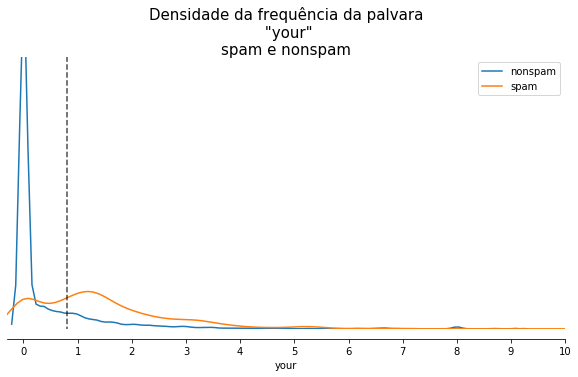

In [11]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.set_xlim(-.3, 10)
ax.set_ylim(0, 3)
ax.set_yticks([])
ax.set_xticks(range(0, 11))

plt.title("Densidade da frequência da palvara\n \"your\"\nspam e nonspam", 
          fontsize=15, pad=-10)

sns.distplot(nonspam_treino['your'], hist=False, label="nonspam")
sns.distplot(spam_treino['your'], hist=False, label="spam")
plt.plot([.8, .8], [-.3, 3], "--", color="black", alpha=0.7)

sns.despine(offset=10, left=True)

plt.show()

## Avaliação

Agora vamos avaliar nosso modelo de predição.

Nossa "quantidade de acerto" são os e-mails em que a frequência da palavra your é menor a 0.8.

In [12]:
acerto = len(treino[treino['your'] < 0.8])/len(treino)

str(round(acerto*100, 2)) + "%"

'63.09%'

Assim, na amostra teste obtivemos um acerto de 63.09%.

In [13]:
acerto = len(teste[teste['your'] < 0.8])/len(teste)

str(round(acerto*100, 2)) + "%"

'62.25%'

Já na nossa amostra teste obtivemos um acerto de 62.25%.

? Como construir um bom algoritmo ?

? Design de predição ?

? Erros Amostrais ?

## Classificador X Regressor

- **Classificador:** Quando os valores de interesse são definidos por uma quantidade limitada de valores discretos, tem-se um problema de classificação.

- **Regressor:** Quando tais valores são contínuos, tem-se um problema de regressão.

~ _No aprendizado de máquina supervisionado, utilizamos um conjunto de treinamento (amostra treino) nos algoritmos, induzindo-os modelos preditivos por meio da observação de determinada variável. Desse modo, um algoritmo de classificação buscará produzir um classificador capaz de generalizar as informações contidas no conjunto de treinamento, com a finalidade de classificar, posteriormente, objetos cujo rótulo seja desconhecido._ ~

#### Bibliografia 

- [IBM: Ciência de dados e machine learning](https://www.ibm.com/br-pt/analytics/machine-learning?cm_mmc=Search_Google-_-Cloud+and+Data+Platform_Data+Science-_-EP_BR-_-%2Bmachine%20%2Blearning_b&cm_mmca1=000038LA&cm_mmca2=10012457&cm_mmca7=1031705&cm_mmca8=aud-787552595492:kwd-26527633773&cm_mmca9=CjwKCAiAzuPuBRAIEiwAkkmOSCSlIwdVFdi068ixumzvj1fqTTUMkbTO-gr3TNZ8Ywxa1rZtPKxG9BoCvdwQAvD_BwE&cm_mmca10=361351154875&cm_mmca11=b&gclid=CjwKCAiAzuPuBRAIEiwAkkmOSCSlIwdVFdi068ixumzvj1fqTTUMkbTO-gr3TNZ8Ywxa1rZtPKxG9BoCvdwQAvD_BwE&gclsrc=aw.ds)

- [Coursera: Aprendizagem Automática](https://pt.coursera.org/learn/machine-learning)

- [USP](https://edisciplinas.usp.br/pluginfile.php/4125431/mod_resource/content/2/mineracaodadosbiologicos-parte5.pdf)